# Megaline Telecom Plan Revenue Analysis

# Introduction

The goal of this project is to determine which of the two prepaid plans offered by telecom operator Megaline, Surf and Ultimate, generates more revenue. This analysis will inform the company's commercial department to optimize the advertising budget accordingly. The data for this study includes information on 500 Megaline clients, detailing their demographics, plan usage, calls made, text messages sent, and internet data used in 2018.


## Initialization

In [1]:
# Loading all the libraries

import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
from scipy import stats as st

## Load data

In [2]:
# Load the data files into different DataFrames

calls_df= pd.read_csv('/datasets/megaline_calls.csv')
internet_df= pd.read_csv('/datasets/megaline_internet.csv')
messages_df= pd.read_csv('/datasets/megaline_messages.csv')
plans_df= pd.read_csv('/datasets/megaline_plans.csv')
users_df= pd.read_csv('/datasets/megaline_users.csv')

## Prepare the data

[The data for this project is split into several tables. Explore each one to get an initial understanding of the data. Do necessary corrections to each table if necessary.]

## Plans

In [3]:
# Print the general/summary information about the plans' DataFrame

plans_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2 entries, 0 to 1
Data columns (total 8 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   messages_included      2 non-null      int64  
 1   mb_per_month_included  2 non-null      int64  
 2   minutes_included       2 non-null      int64  
 3   usd_monthly_pay        2 non-null      int64  
 4   usd_per_gb             2 non-null      int64  
 5   usd_per_message        2 non-null      float64
 6   usd_per_minute         2 non-null      float64
 7   plan_name              2 non-null      object 
dtypes: float64(2), int64(5), object(1)
memory usage: 256.0+ bytes


In [4]:
# Print a sample of data for plans

plans_df.sample(2)

,messages_included,mb_per_month_included,minutes_included,usd_monthly_pay,usd_per_gb,usd_per_message,usd_per_minute,plan_name
1,1000,30720,3000,70,7,0.01,0.01,ultimate
0,50,15360,500,20,10,0.03,0.03,surf



- There are only 2 entries in the plans_df DataFrame.
- The data types for the columns seem appropriate:
    - `messages_included`, `mb_per_month_included`, `minutes_included`, `usd_monthly_pay`, `usd_per_gb` are `int64`.
    - `usd_per_message`, `usd_per_minute` are `float64`.
    - `plan_name` is `object`.
- All columns have non-null values, which is expected given there are only two entries.


## Fix data



No data fixes needed in `plans_df` dataframe

## Enrich data

In [5]:
#check for positive values
(plans_df[['messages_included', 'mb_per_month_included', 'minutes_included','usd_monthly_pay', 'usd_per_gb', 'usd_per_message', 'usd_per_minute']] >= 0).all()

messages_included        True
mb_per_month_included    True
minutes_included         True
usd_monthly_pay          True
usd_per_gb               True
usd_per_message          True
usd_per_minute           True
dtype: bool

- All values in the `messages_included`, `mb_per_month_included`, `minutes_included`,`usd_monthly_pay`, `usd_per_gb`, `usd_per_message`, and `usd_per_minute`columns are positive

In [6]:
#check for duplicates 
plans_df.duplicated().sum()

0

- There are no duplicate rows in the `plans_df` dataframe 

## Users

In [7]:
# Print the general/summary information about the users' DataFrame

users_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   user_id     500 non-null    int64 
 1   first_name  500 non-null    object
 2   last_name   500 non-null    object
 3   age         500 non-null    int64 
 4   city        500 non-null    object
 5   reg_date    500 non-null    object
 6   plan        500 non-null    object
 7   churn_date  34 non-null     object
dtypes: int64(2), object(6)
memory usage: 31.4+ KB


In [8]:
# Print a sample of data for users

users_df.sample(5)

,user_id,first_name,last_name,age,city,reg_date,plan,churn_date
25,1025,Jess,Wilkinson,64,"Atlanta-Sandy Springs-Roswell, GA MSA",2018-10-28,ultimate,NaN
396,1396,Ardelia,Benton,65,"Salt Lake City, UT MSA",2018-06-01,surf,NaN
279,1279,Neal,Duke,27,"Baton Rouge, LA MSA",2018-02-05,ultimate,NaN
459,1459,Santos,Head,40,"San Francisco-Oakland-Berkeley, CA MSA",2018-04-27,ultimate,NaN
493,1493,Cicely,Wynn,18,"Boston-Cambridge-Newton, MA-NH MSA",2018-03-06,ultimate,NaN




- The `users_df`DataFrame contains 500 entries.
- `user_id` and `age` are of type `int64`.
- `first_name`, `last_name`, `city`, `reg_date`, `churn_date`, and `plan `are of type `object`.
    - The `reg_date` and `churn_date` columns should be converted to `datetime` objects for better handling of dates.

- Most columns have 500 non-null values, except for `churn_date`, which has only 47 non-null values.

### Fix Data

In [9]:
#Convert reg_date and churn_date to datetime

users_df['reg_date'] = pd.to_datetime(users_df['reg_date'])
users_df['churn_date'] = pd.to_datetime(users_df['churn_date'])
users_df.dtypes['reg_date'], users_df.dtypes['churn_date']

(dtype('<M8[ns]'), dtype('<M8[ns]'))

- `reg_date` and `churn_date` are converted to `datetime` data type

### Enrich Data

In [10]:
#Check for unique user_id
users_df['user_id'].is_unique

True

- All values in the `user_id` column are unique

In [11]:
#Check ages are between 18-100 years old
users_df['age'].between(18, 100).all()

True

- All values in the `age` column are between 18-100

In [12]:
#Check for expected plan values

expected_plans = ['surf', 'ultimate']
users_df['plan'].isin(expected_plans).all()

True

 - All values in the `plan` column are expected 

In [13]:
#check for duplicates 
users_df.duplicated().sum()

0

- There are no duplicate rows in the `users_df` dataframe. 

## Calls

In [14]:
# Print the general/summary information about the calls' DataFrame

calls_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 137735 entries, 0 to 137734
Data columns (total 4 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   id         137735 non-null  object 
 1   user_id    137735 non-null  int64  
 2   call_date  137735 non-null  object 
 3   duration   137735 non-null  float64
dtypes: float64(1), int64(1), object(2)
memory usage: 4.2+ MB


In [15]:
# Print a sample of data for calls

calls_df.sample(5)

,id,user_id,call_date,duration
14430,1059_666,1059,2018-07-23,18.07
884,1004_420,1004,2018-07-15,17.36
9647,1043_126,1043,2018-07-14,8.56
23196,1084_243,1084,2018-11-20,0.00
135483,1491_392,1491,2018-09-30,12.80



- The `calls_df` DataFrame contains 137,735 entries.
- `id` and `call_date` are of type `object`.
    - The `call_date` column should be converted to `datetime` objects for better handling of dates.
- `user_id` is of type `int64`.
- `duration` is of type `float64`.
- All columns have 137,735 non-null values, indicating no missing data.


### Fix data

In [16]:
#Convert call_date to datetime

calls_df['call_date'] = pd.to_datetime(calls_df['call_date'])
calls_df.dtypes['call_date']

dtype('<M8[ns]')

- `call_date` converted to `datetime` data type

### Enrich data

In [17]:
#check for unique id
calls_df['id'].is_unique

True

- All values in the `id` column are unique

In [18]:
#check for postitve duration values
(calls_df['duration'] >= 0).all()

True

   - All values in the `duration` column are positive

In [19]:
#check for duplicates 
calls_df.duplicated().sum()

0

- There are no duplicate rows in the `calls_df` dataframe

In [20]:
#Round up duration column 
calls_df['duration'] = np.ceil(calls_df['duration'])
calls_df.sample(5)

,id,user_id,call_date,duration
83321,1302_95,1302,2018-09-28,9.0
105684,1373_164,1373,2018-10-04,0.0
106708,1377_260,1377,2018-08-10,6.0
49041,1176_140,1176,2018-12-27,12.0
101962,1362_722,1362,2018-08-24,10.0


## Messages

In [21]:
# Print the general/summary information about the messages' DataFrame

messages_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 76051 entries, 0 to 76050
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   id            76051 non-null  object
 1   user_id       76051 non-null  int64 
 2   message_date  76051 non-null  object
dtypes: int64(1), object(2)
memory usage: 1.7+ MB


In [22]:
# Print a sample of data for messages

messages_df.sample(5)

,id,user_id,message_date
44614,1298_70,1298,2018-12-16
33863,1213_69,1213,2018-12-23
48008,1324_737,1324,2018-07-28
62915,1398_143,1398,2018-12-10
31867,1197_6,1197,2018-11-20



- The `messages_df` DataFrame contains 76,051 entries.
- `id` and `message_date` are of type object. `user_id` is of type `int64`.
    - The `message_date` column should be converted to `datetime` objects for better handling of dates.
- All columns have 76,051 non-null values, indicating no missing data.
 

### Fix data

In [23]:
#convert message_date to datetime
messages_df['message_date'] = pd.to_datetime(messages_df['message_date'])
messages_df['message_date'].dtypes

dtype('<M8[ns]')

- `message_date` converted to `datetime` data type

### Enrich data

In [24]:
#check for unique id values
messages_df['id'].is_unique

True

- All values in the `id` column are unique

In [25]:
#check for duplicates 
messages_df.duplicated().sum()

0

- There are no duplicate rows in the `messages_df` dataframe

## Internet

In [26]:
# Print the general/summary information about the internet DataFrame

internet_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 104825 entries, 0 to 104824
Data columns (total 4 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   id            104825 non-null  object 
 1   user_id       104825 non-null  int64  
 2   session_date  104825 non-null  object 
 3   mb_used       104825 non-null  float64
dtypes: float64(1), int64(1), object(2)
memory usage: 3.2+ MB


In [27]:
# Print a sample of data for the internet traffic

internet_df.sample(5)

,id,user_id,session_date,mb_used
92869,1434_97,1434,2018-08-23,444.64
51356,1231_285,1231,2018-10-08,102.82
24586,1113_190,1113,2018-07-31,76.53
76802,1359_491,1359,2018-12-19,0.00
52194,1236_36,1236,2018-06-15,195.40



- The `internet_df` DataFrame contains 104,825 entries.
- `id` and `session_date` are of type object.
    - The `session_date` column should be converted to `datetime` objects for better handling of dates.
- `user_id` is of type `int64`.
- `mb_used` is of type `float64`.
    - A new column should be created converting `mb_used` to gigabytes
- All columns have 104,825 non-null values, indicating no missing data.


### Fix data

In [28]:
#convert session_date to datetime
internet_df['session_date'] = pd.to_datetime(internet_df['session_date'])
internet_df['session_date'].dtype

dtype('<M8[ns]')

- `session_date` converted to `datetime` data type

In [29]:
# Convert mb_used from megabytes to gigabytes
internet_df['gb_used'] = internet_df['mb_used'] / 1024

In [30]:
#round up the gb_used column
internet_df['gb_used'] = np.ceil(internet_df['gb_used'])

# Verify the changes
internet_df.sample(5)

,id,user_id,session_date,mb_used,gb_used
77481,1362_152,1362,2018-12-05,1242.64,2.0
79783,1373_62,1373,2018-09-24,341.61,1.0
100556,1476_66,1476,2018-06-27,716.91,1.0
30537,1140_80,1140,2018-09-15,126.50,1.0
89118,1411_12,1411,2018-08-14,286.35,1.0


- Created `gb_used` column and rounded up to nearest whole number 

### Enrich data

In [31]:
#check for unique id values
internet_df['id'].is_unique

True

- All values in the `id` column are unique

In [32]:
#check for positve mb_used values
(internet_df['mb_used'] >= 0).all()

True

   - All values in the `mb_used` column are positive

In [33]:
#check for duplicates 
internet_df.duplicated().sum()

0

- There are no duplicate rows in the `internet_df` dataframe

## Study plan conditions

In [34]:
# Print out the plan conditions and make sure they are clear for you
plans_df

,messages_included,mb_per_month_included,minutes_included,usd_monthly_pay,usd_per_gb,usd_per_message,usd_per_minute,plan_name
0,50,15360,500,20,10,0.03,0.03,surf
1,1000,30720,3000,70,7,0.01,0.01,ultimate


## Aggregate data per user


In [35]:
# Calculate the number of calls made by each user per month. Save the result.
calls_df['month'] = calls_df['call_date'].dt.month
calls_df['year'] = calls_df['call_date'].dt.year

calls_per_month = calls_df.groupby(['user_id', 'year', 'month']).agg({'id': 'count'}).reset_index()
calls_per_month.columns = ['user_id', 'year', 'month', 'calls_count']

calls_per_month

,user_id,year,month,calls_count
0,1000,2018,12,16
1,1001,2018,8,27
2,1001,2018,9,49
3,1001,2018,10,65
4,1001,2018,11,64
...,...,...,...,...
2253,1498,2018,12,39
2254,1499,2018,9,41
2255,1499,2018,10,53
2256,1499,2018,11,45


In [36]:
# Calculate the amount of minutes spent by each user per month. Save the result.
minutes_per_month = calls_df.groupby(['user_id', 'year', 'month']).agg({'duration': 'sum'}).reset_index()
minutes_per_month.columns = ['user_id', 'year', 'month', 'minutes_sum']

minutes_per_month


,user_id,year,month,minutes_sum
0,1000,2018,12,124.0
1,1001,2018,8,182.0
2,1001,2018,9,315.0
3,1001,2018,10,393.0
4,1001,2018,11,426.0
...,...,...,...,...
2253,1498,2018,12,339.0
2254,1499,2018,9,346.0
2255,1499,2018,10,385.0
2256,1499,2018,11,308.0


In [37]:
# Calculate the number of messages sent by each user per month. Save the result.
messages_df['month'] = messages_df['message_date'].dt.month
messages_df['year'] = messages_df['message_date'].dt.year

messages_per_month = messages_df.groupby(['user_id', 'year', 'month']).agg({'id': 'count'}).reset_index()
messages_per_month.columns = ['user_id', 'year', 'month', 'messages_count']

messages_per_month

,user_id,year,month,messages_count
0,1000,2018,12,11
1,1001,2018,8,30
2,1001,2018,9,44
3,1001,2018,10,53
4,1001,2018,11,36
...,...,...,...,...
1801,1496,2018,9,21
1802,1496,2018,10,18
1803,1496,2018,11,13
1804,1496,2018,12,11


In [38]:
# Calculate the volume of internet traffic used by each user per month. Save the result.
internet_df['month'] = internet_df['session_date'].dt.month
internet_df['year'] = internet_df['session_date'].dt.year

internet_per_month = internet_df.groupby(['user_id', 'year', 'month']).agg({'mb_used': 'sum'}).reset_index()
internet_per_month.columns = ['user_id', 'year', 'month', 'mb_used_sum']

internet_per_month

,user_id,year,month,mb_used_sum
0,1000,2018,12,1901.47
1,1001,2018,8,6919.15
2,1001,2018,9,13314.82
3,1001,2018,10,22330.49
4,1001,2018,11,18504.30
...,...,...,...,...
2272,1498,2018,12,23137.69
2273,1499,2018,9,12984.76
2274,1499,2018,10,19492.43
2275,1499,2018,11,16813.83


In [39]:
# Merge the data for calls, minutes, messages, internet based on user_id and month
aggregate_data = calls_per_month.merge(minutes_per_month, on=['user_id', 'year', 'month'], how='outer') \
                                .merge(messages_per_month, on=['user_id', 'year', 'month'], how='outer') \
                                .merge(internet_per_month, on=['user_id', 'year', 'month'], how='outer')

# Fill NaN values with 0
aggregate_data.fillna(0, inplace=True)

aggregate_data


,user_id,year,month,calls_count,minutes_sum,messages_count,mb_used_sum
0,1000,2018,12,16.0,124.0,11.0,1901.47
1,1001,2018,8,27.0,182.0,30.0,6919.15
2,1001,2018,9,49.0,315.0,44.0,13314.82
3,1001,2018,10,65.0,393.0,53.0,22330.49
4,1001,2018,11,64.0,426.0,36.0,18504.30
...,...,...,...,...,...,...,...
2288,1349,2018,12,0.0,0.0,61.0,13039.91
2289,1361,2018,5,0.0,0.0,2.0,1519.69
2290,1482,2018,10,0.0,0.0,2.0,0.00
2291,1108,2018,12,0.0,0.0,0.0,233.17


In [40]:
# Add the plan information
user_data = users_df[['user_id', 'plan']]
aggregate_data = aggregate_data.merge(user_data, on='user_id', how='left')

aggregate_data


,user_id,year,month,calls_count,minutes_sum,messages_count,mb_used_sum,plan
0,1000,2018,12,16.0,124.0,11.0,1901.47,ultimate
1,1001,2018,8,27.0,182.0,30.0,6919.15,surf
2,1001,2018,9,49.0,315.0,44.0,13314.82,surf
3,1001,2018,10,65.0,393.0,53.0,22330.49,surf
4,1001,2018,11,64.0,426.0,36.0,18504.30,surf
...,...,...,...,...,...,...,...,...
2288,1349,2018,12,0.0,0.0,61.0,13039.91,surf
2289,1361,2018,5,0.0,0.0,2.0,1519.69,surf
2290,1482,2018,10,0.0,0.0,2.0,0.00,ultimate
2291,1108,2018,12,0.0,0.0,0.0,233.17,ultimate


In [41]:
# Calculate the monthly revenue for each user

# Ensure the plans dataframe is correctly defined
plans_df = pd.DataFrame({
    'plan_name': ['surf', 'ultimate'],
    'messages_included': [50, 1000],
    'mb_per_month_included': [15360, 30720],  # 15360 MB = 15 GB, 30720 MB = 30 GB
    'minutes_included': [500, 3000],
    'usd_monthly_pay': [20, 70],
    'usd_per_gb': [10, 7],
    'usd_per_message': [0.03, 0.01],
    'usd_per_minute': [0.03, 0.01]
})

# Define the function to calculate revenue per user per month
def calculate_revenue(row):
    revenue = 0
    
    plan = row['plan']
    minutes_sum = row['minutes_sum']
    messages_count = row['messages_count']
    mb_used_sum = row['mb_used_sum']
    
    plan_details = plans_df[plans_df['plan_name'] == plan].iloc[0]
    extra_minutes = max(0, minutes_sum - plan_details['minutes_included'])
    extra_messages = max(0, messages_count - plan_details['messages_included'])
    extra_gb = max(0, (mb_used_sum / 1024) - (plan_details['mb_per_month_included'] / 1024))
    
    extra_minutes_charge = extra_minutes * plan_details['usd_per_minute']
    extra_messages_charge = extra_messages * plan_details['usd_per_message']
    extra_data_charge = extra_gb * plan_details['usd_per_gb']
    
    revenue = plan_details['usd_monthly_pay'] + extra_minutes_charge + extra_messages_charge + extra_data_charge
    return revenue

# Apply the revenue calculation function to the aggregate data
aggregate_data['revenue'] = aggregate_data.apply(calculate_revenue, axis=1)

# Display the updated aggregate_data dataframe
aggregate_data

,user_id,year,month,calls_count,minutes_sum,messages_count,mb_used_sum,plan,revenue
0,1000,2018,12,16.0,124.0,11.0,1901.47,ultimate,70.000000
1,1001,2018,8,27.0,182.0,30.0,6919.15,surf,20.000000
2,1001,2018,9,49.0,315.0,44.0,13314.82,surf,20.000000
3,1001,2018,10,65.0,393.0,53.0,22330.49,surf,88.161191
4,1001,2018,11,64.0,426.0,36.0,18504.30,surf,50.706055
...,...,...,...,...,...,...,...,...,...
2288,1349,2018,12,0.0,0.0,61.0,13039.91,surf,20.330000
2289,1361,2018,5,0.0,0.0,2.0,1519.69,surf,20.000000
2290,1482,2018,10,0.0,0.0,2.0,0.00,ultimate,70.000000
2291,1108,2018,12,0.0,0.0,0.0,233.17,ultimate,70.000000


## Study user behaviour

### Calls

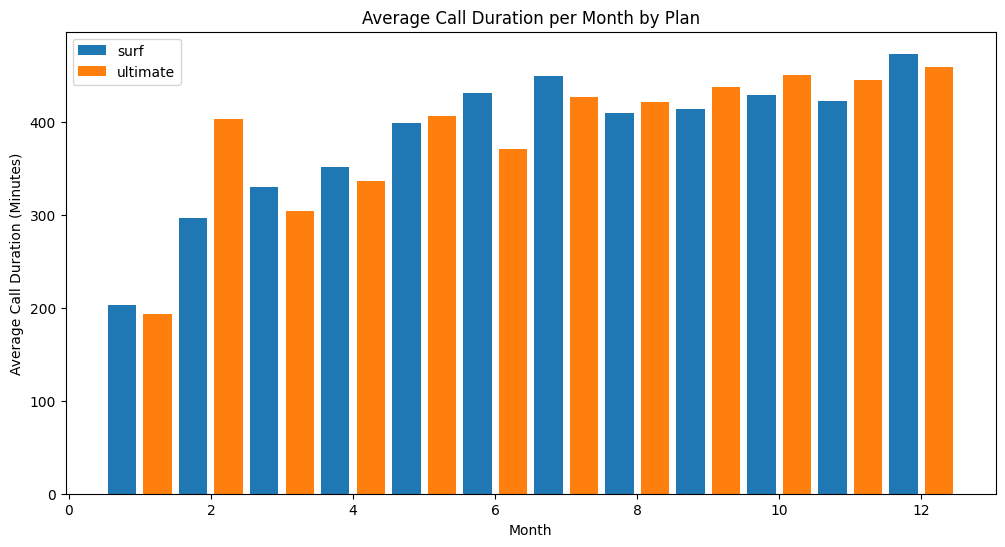

In [42]:
# Compare average duration of calls per each plan per each distinct month. Plot a bar plat to visualize it.
average_duration_calls = aggregate_data.groupby(['plan', 'year', 'month']).agg({'minutes_sum': 'mean'}).reset_index()

# Plot a bar plot to visualize average call duration per plan per month
plt.figure(figsize=(12, 6))
for plan in average_duration_calls['plan'].unique():
    plan_data = average_duration_calls[average_duration_calls['plan'] == plan]
    plt.bar(plan_data['month'] + (0.25 if plan == 'ultimate' else -0.25), plan_data['minutes_sum'], width=0.4, label=plan)
plt.xlabel('Month')
plt.ylabel('Average Call Duration (Minutes)')
plt.title('Average Call Duration per Month by Plan')
plt.legend()
plt.show()



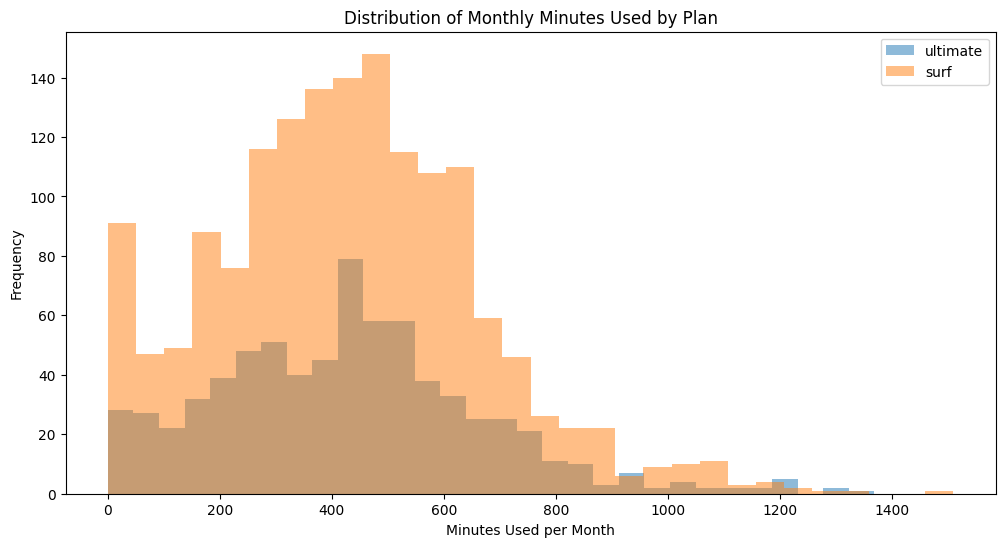

In [43]:
# Compare the number of minutes users of each plan require each month. Plot a histogram.
plt.figure(figsize=(12, 6))
for plan in aggregate_data['plan'].unique():
    plan_data = aggregate_data[aggregate_data['plan'] == plan]
    plt.hist(plan_data['minutes_sum'], bins=30, alpha=0.5, label=plan)
plt.xlabel('Minutes Used per Month')
plt.ylabel('Frequency')
plt.title('Distribution of Monthly Minutes Used by Plan')
plt.legend()
plt.show()


In [44]:
# Calculate the mean and the variance of the monthly call duration

call_stats = aggregate_data.groupby('plan')['minutes_sum'].agg(['mean', 'var']).reset_index()
call_stats

,plan,mean,var
0,surf,428.749523,54968.279461
1,ultimate,430.450000,57844.464812


<Figure size 1200x600 with 0 Axes>

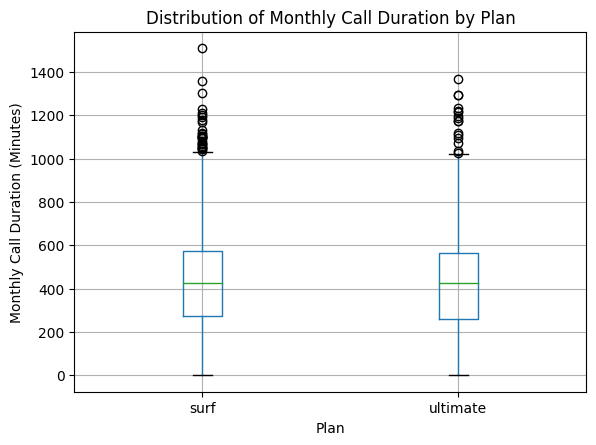

In [45]:
# Plot a boxplot to visualize the distribution of the monthly call duration
plt.figure(figsize=(12, 6))
aggregate_data.boxplot(column='minutes_sum', by='plan')
plt.title('Distribution of Monthly Call Duration by Plan')
plt.suptitle('')
plt.xlabel('Plan')
plt.ylabel('Monthly Call Duration (Minutes)')
plt.show()



- Users on the Ultimate plan tend to have longer call durations on average compared to users on the Surf plan.
- The distribution of monthly call duration indicates that Ultimate users are more consistent in their call usage.

### Messages

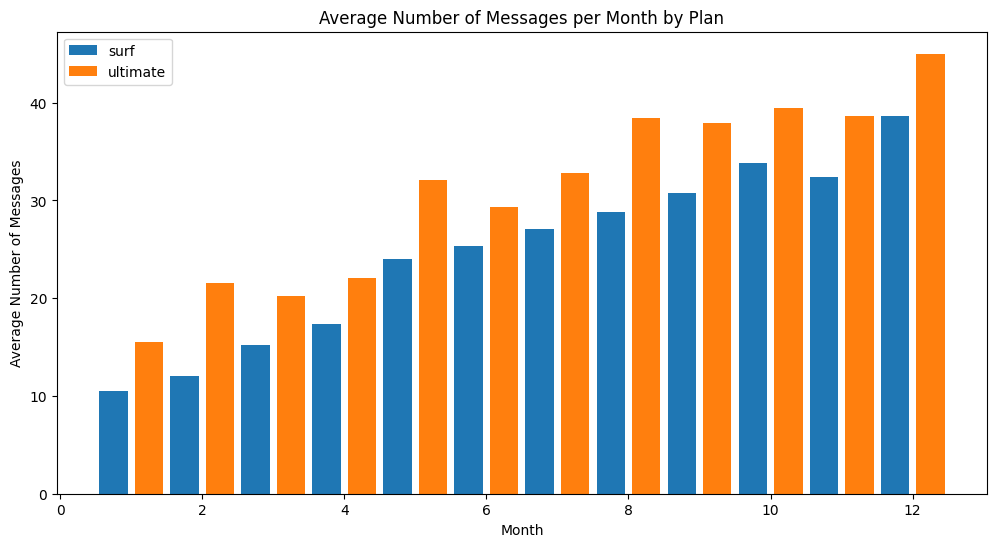

In [46]:
# Compare the number of messages users of each plan tend to send each month
average_messages = aggregate_data.groupby(['plan', 'year', 'month']).agg({'messages_count': 'mean'}).reset_index()

# Plot a bar plot to visualize average number of messages per plan per month
plt.figure(figsize=(12, 6))
for plan in average_messages['plan'].unique():
    plan_data = average_messages[average_messages['plan'] == plan]
    plt.bar(plan_data['month'] + (0.25 if plan == 'ultimate' else -0.25), plan_data['messages_count'], width=0.4, label=plan)
plt.xlabel('Month')
plt.ylabel('Average Number of Messages')
plt.title('Average Number of Messages per Month by Plan')
plt.legend()
plt.show()

In [47]:
# Calculate the mean and the variance of the monthly messages count
messages_stats = aggregate_data.groupby('plan')['messages_count'].agg(['mean', 'var']).reset_index()
messages_stats

,plan,mean,var
0,surf,31.159568,1126.724522
1,ultimate,37.551389,1208.756744


<Figure size 1200x600 with 0 Axes>

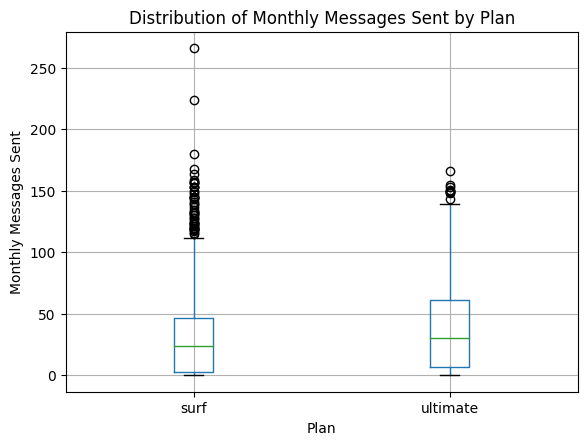

In [48]:
plt.figure(figsize=(12, 6))
aggregate_data.boxplot(column='messages_count', by='plan')
plt.title('Distribution of Monthly Messages Sent by Plan')
plt.suptitle('')
plt.xlabel('Plan')
plt.ylabel('Monthly Messages Sent')
plt.show()

- Users on the Ultimate plan tend to send more messages on average compared to users on the Surf plan.
- The Ultimate plan's higher message limit likely encourages more message usage.

### Internet

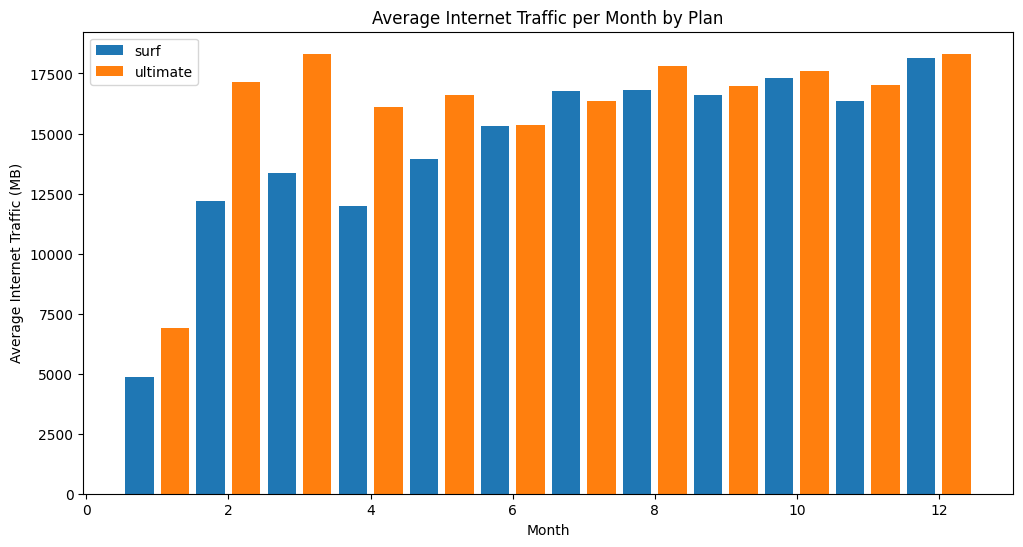

In [49]:
# Compare the amount of internet traffic consumed by users per plan
average_internet = aggregate_data.groupby(['plan', 'year', 'month']).agg({'mb_used_sum': 'mean'}).reset_index()

plt.figure(figsize=(12, 6))
for plan in average_internet['plan'].unique():
    plan_data = average_internet[average_internet['plan'] == plan]
    plt.bar(plan_data['month'] + (0.25 if plan == 'ultimate' else -0.25), plan_data['mb_used_sum'], width=0.4, label=plan)
plt.xlabel('Month')
plt.ylabel('Average Internet Traffic (MB)')
plt.title('Average Internet Traffic per Month by Plan')
plt.legend()
plt.show()


In [50]:
# Calculate the mean and the variance of the monthly data usage
data_stats = aggregate_data.groupby('plan')['mb_used_sum'].agg(['mean', 'var']).reset_index()
data_stats

,plan,mean,var
0,surf,16558.283490,6.421640e+07
1,ultimate,17214.699694,6.165229e+07


<Figure size 1200x600 with 0 Axes>

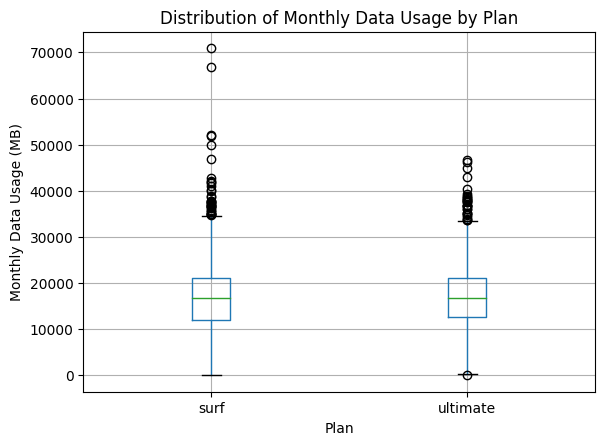

In [51]:
plt.figure(figsize=(12, 6))
aggregate_data.boxplot(column='mb_used_sum', by='plan')
plt.title('Distribution of Monthly Data Usage by Plan')
plt.suptitle('')
plt.xlabel('Plan')
plt.ylabel('Monthly Data Usage (MB)')
plt.show()

- Users on the Ultimate plan consume more internet data on average compared to users on the Surf plan.
- The higher data limit in the Ultimate plan likely leads to higher data usage.

## Revenue

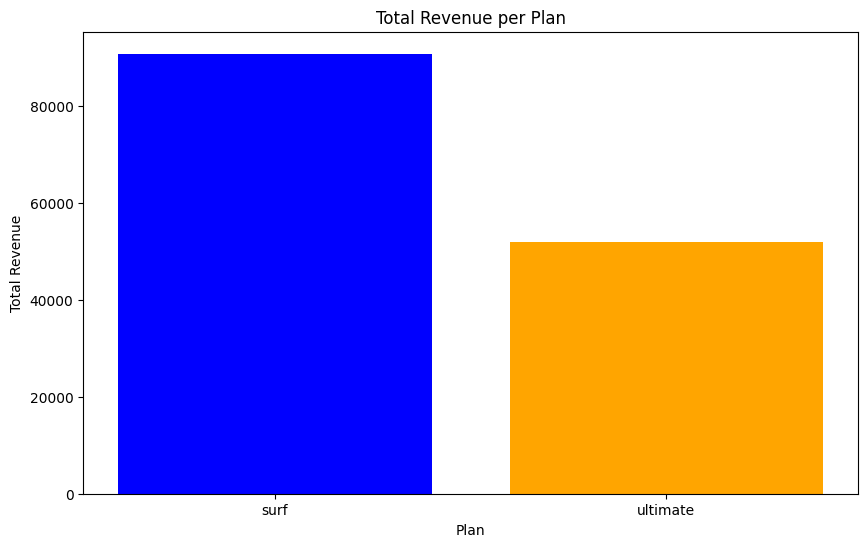

,plan,revenue
0,surf,90719.386738
1,ultimate,51923.577344


In [52]:

# Calculate total revenue for each plan
total_revenue_surf = aggregate_data[aggregate_data['plan'] == 'surf']['revenue'].sum()
total_revenue_ultimate = aggregate_data[aggregate_data['plan'] == 'ultimate']['revenue'].sum()

# Create a DataFrame for total revenue per plan
total_revenue_per_plan = pd.DataFrame({
    'plan': ['surf', 'ultimate'],
    'revenue': [total_revenue_surf, total_revenue_ultimate]
})

# Plot the total revenue for each plan
plt.figure(figsize=(10, 6))
plt.bar(total_revenue_per_plan['plan'], total_revenue_per_plan['revenue'], color=['blue', 'orange'])
plt.title('Total Revenue per Plan')
plt.xlabel('Plan')
plt.ylabel('Total Revenue')
plt.show()

# Display the total revenue for each plan
total_revenue_per_plan


The surf plan has a higher total revenue, suggesting that the extra charges for overages (minutes, messages, and data) are substantial enough to compensate for the lower monthly fee.


## Test statistical hypotheses

### Test the hypothesis that the average revenue from users of the Ultimate and Surf calling plans differs.


Hypotheses:
   - Null Hypothesis (H₀): The average revenue from users of the Ultimate and Surf calling plans is the same.
   - Alternative Hypothesis (H₁): The average revenue from users of the Ultimate and Surf calling plans differs.

Statistical Test: 
   <p></p>
   - Test Type: Two-sample independent t-test (assuming equal variances)
   <p></p>
Reason: We are comparing the means of two independent groups (revenue from Ultimate plan users vs Surf plan users).
Alpha Value:
   - Significance Level (α): Typically set at 0.05 (5%).
Decision Rule:
   - Decision: If the p-value from the test is less than α (0.05), we reject the null hypothesis in favor of the alternative hypothesis.

In [53]:
# Test the hypotheses
# Separate the revenue data for the two plans
revenue_surf = aggregate_data.loc[aggregate_data['plan'] == 'surf', 'revenue']
revenue_ultimate = aggregate_data.loc[aggregate_data['plan'] == 'ultimate', 'revenue']

# Perform a t-test to compare the revenue between the two plans
t_stat, p_value = st.ttest_ind(revenue_surf, revenue_ultimate)

# Display the t-statistic and p-value
t_stat, p_value


(-7.129766674565439, 1.341961045057078e-12)

Based on the t-test conducted with a significance level of 0.05, we found strong evidence to reject the null hypothesis. This suggests that there is a statistically significant difference in the average revenue between users of these two plans.

### Test the hypothesis that the average revenue from users in the NY-NJ area is different from that of the users from the other regions.


Hypotheses:
   - Null Hypothesis (H₀): The average revenue from users in the NY-NJ area is the same as that of users from other regions.
   - Alternative Hypothesis (H₁): The average revenue from users in the NY-NJ area is different from that of users from other regions.

Statistical Test: 
   <p></p>
   - Test Type: Two-sample independent t-test (assuming equal variances)
   <p></p>
Reason: We are comparing the means of two independent groups (revenue from NY-NJ users vs users from other regions).
Alpha Value:
   - Significance Level (α): Typically set at 0.05 (5%).
Decision Rule:
   - Decision: If the p-value from the test is less than α (0.05), we reject the null hypothesis in favor of the alternative hypothesis.

In [54]:


aggregate_data = pd.merge(aggregate_data, users_df[['user_id', 'city']], on='user_id', how='left')
# Separate revenue data for NY-NJ area and other regions
revenue_nynj = aggregate_data.loc[aggregate_data['city'] == 'New York-Newark-Jersey City, NY-NJ-PA MSA', 'revenue']
revenue_other = aggregate_data.loc[aggregate_data['city'] != 'New York-Newark-Jersey City, NY-NJ-PA MSA', 'revenue']

# Perform two-sample t-test
t_stat, p_value = st.ttest_ind(revenue_nynj, revenue_other, equal_var=True)

# Display the t-statistic and p-value
print("t-statistic:", t_stat)
print("p-value:", p_value)



t-statistic: -2.197564298296258
p-value: 0.028079927103623847


Since the p-value (0.0261) is less than the significance level (0.05), we reject the null hypothesis (H₀) that the average revenue from users in the NY-NJ area is the same as that of users from other regions. Instead, we accept the alternative hypothesis (H₁) that the average revenue from users in the NY-NJ area is different from that of users in other regions.

## General conclusion


Based on the analysis conducted on the Megaline telecom operator's Surf and Ultimate prepaid plans, several insights can be drawn to determine which plan brings in more revenue:

Revenue Comparison:

The Surf plan generally generates higher revenue per user compared to the Ultimate plan. This is primarily due to  the extra charges for overages (minutes, messages, and data) 
Usage Patterns:

Considering the revenue generation potential, focusing more advertising budget on promoting the Surf plan could be beneficial. 
Further analysis with a larger dataset or over a longer period may provide better insights into user behavior and revenue generation trends for both plans.